$$\min -\sum_{1=1}^m\log(1-a_i^T x)-\sum_{i=1}^n\log\left(1-x_i^2\right)$$

In [37]:
import numpy as np
from newton import *
import cvxpy as cp
import matplotlib.pyplot as plt


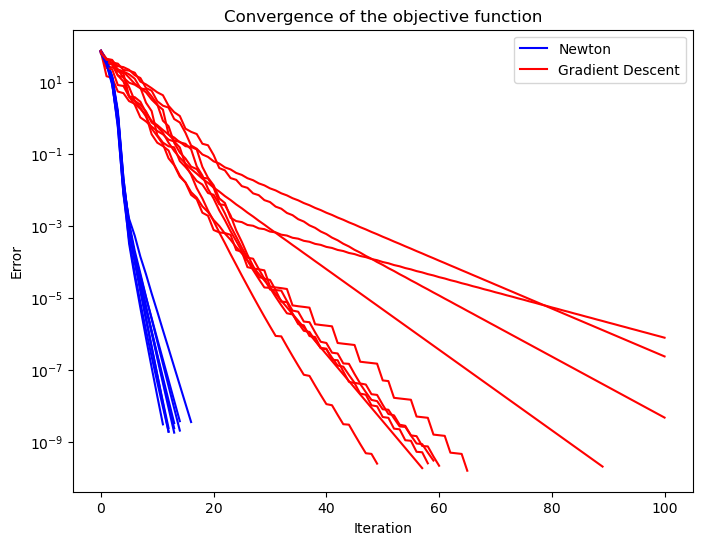

In [38]:
rounds = 10
alpha = 0.01
plt.figure(figsize=(8, 6))
for round in range(rounds):
    m = 50
    n = 100
    A = np.random.randn(m, n)
    b = np.ones(m)

    f = lambda x: -np.sum(np.log(1 - A @ x)) - np.sum(np.log(1 - x**2))
    grad_f = lambda x: A.T @ (1/(1 - A @ x)) + 2*x/(1 - x**2)
    nabla_f = lambda x: A.T @ np.diag(1/(1 - A @ x)**2) @ A + np.diag(2/(1 - x**2)**2)
    
    cvx_solution = solve_by_cvx(A, b)
    
    def domf(x, A=A, b=b):
        cons_1 = A @ x - b < 0
        cons_2 = np.abs(x) - 1 < 0
        return np.all(cons_1) and np.all(cons_2)

    # Change N and diag_only=True to solve 9.31
    
    x_newton, f_newton = newton(f, grad_f, nabla_f, np.zeros(n), A, b, domf, TOL=1e-8, alpha=alpha, N=1, diag_only=False, print_iter=False)
    plot_error_iter(x_newton, f_newton, cvx_solution, label='Newton', color='blue')
    
    # x_newton_2, f_newton_2 = newton(f, grad_f, nabla_f, np.zeros(n), A, b, domf, TOL=1e-8,alpha=alpha, N=2, diag_only=False,print_iter=False)
    # plot_error_iter(x_newton_2, f_newton_2, cvx_solution, label='Newton (N=2)', color='red')
    
    # x_newton_5, f_newton_5 = newton(f, grad_f, nabla_f, np.zeros(n), A, b, domf, TOL=1e-8,alpha=alpha, N=5, diag_only=False,print_iter=False)
    # plot_error_iter(x_newton_5, f_newton_5, cvx_solution, label='Newton (N=5)', color='green')
    
    # Diagonal only
    # x_newton_diag, f_newton_diag = newton(f, grad_f, nabla_f, np.zeros(n), A, b, domf, TOL=1e-8, alpha=alpha, N=1, diag_only=True, print_iter=False)
    # plot_error_iter(x_newton_diag, f_newton_diag, cvx_solution, label='Newton (diagonal only)', color='green')
    
    # Gradient descent method.
    x_grad, f_grad = gradient_descent(f, grad_f, np.zeros(n), A, b, domf, TOL=1e-8, alpha=alpha, print_iter=False)
    plot_error_iter(x_grad, f_grad, cvx_solution, label='Gradient Descent', color='red')

    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title('Convergence of the objective function')
    
plt.legend(['Newton','Gradient Descent'])    
# plt.legend(['Newton', 'Newton (diagonal only)','Gradient Descent'])
# plt.legend(['Newton','Newton (N=2)','Newton (N=5)'])
# plt.savefig('./figure/hw4_m%d_n%d_a%.2f_9-30.png'%(m,n,alpha))
plt.show()